# Second order k-essence vs k-evolution

In [1]:
import numpy as np
import matplotlib.pylab as plt
from scipy.interpolate import interp1d
from pylab import rcParams
import scipy.integrate as integrate
import h5py
from mayavi import mlab

# from readgadget import *
# from pygadgetreader import *
ColorsI = ["red","blue","green","purple","darkcyan","gold","maroon","black","darkslategrey",
           "darkgreen","navy","indigo","magenta","salmon","dodgerblue","springgreen","plum",
           "cyan","khaki","lightcoral","gray"]
ColorsII = []

NUM_COLORS = 20
from matplotlib.colors import LogNorm

cm = plt.get_cmap('gist_rainbow')
# plt.style.use('seaborn-paper')
plt.rcParams['font.serif'] = 'Ubuntu'
from matplotlib import colors, ticker, cm
from mpl_toolkits.axes_grid1 import make_axes_locatable

from mpl_toolkits.mplot3d import Axes3D
from collections import defaultdict

text_size=26
fig_size_x=24
fig_size_y=14

# Nested dictionary

In [2]:
def nested_dict(n, type):
    if n == 1:
        return defaultdict(type)
    else:
        return defaultdict(lambda: nested_dict(n-1, type))
snaps = nested_dict(5, list)
data_txt = nested_dict(1, list)

## Background

In [3]:
As=2.215*1.e-9;
h=0.67556;
kp=0.05/h; 
ns=0.9619;
cs2_e3=1.e-7;
c=2.99792458*1.e5; #Km/s
Boxsize=300.;
# c_gev=2997.92458; #[100km/s]
H0_conf_Gev=0.11117550483538947#np.sqrt(Boxsize**2/c**2); #0.10677 rho_crit in Gev=1
# we obtain 0.11 from gevolution!

# H0=100*h/c; #H0 in 1/Mpc unit. 0.00022593979933110373
# print("H0[1/Mpc]=100h/c: ",H0);
w=-0.9;
# print("H0[1/Mpc]=100h/c: ",H0);
def Hubble_conf_Mpc(a):
    c=2.99792458*1.e5;h=0.67556;H0=100*h/c;w=-0.9;
    Omega_b=0.022032/h/h; Omega_cdm=0.12038/h/h;
    Omega_m=Omega_b+Omega_cdm; Omega_Lambda=0;
    Omega_rad=9.1671353942930788e-05; Omega_kessence=1.-Omega_m-Omega_rad;
    return H0_conf_Gev*np.sqrt(Omega_m*(a**-3)+Omega_rad*(a**-4)+Omega_kessence*(a**(-3*(1+w))))
Omega_b=0.022032/h/h; Omega_cdm=0.12038/h/h;
Omega_m=Omega_b + Omega_cdm;

#  Loading HDF5 files for pi and zeta + the Blowup snapshots

In [45]:


files_list = ['L400-N64-dtau-0d01.txt'];
# files_list += ['L1000-N64-dtau-0d01.txt'];

for j in range(np.shape(files_list)[0]):
    data_txt[files_list[j]] = np.loadtxt("./Avg_outputs//"+files_list[j])
        

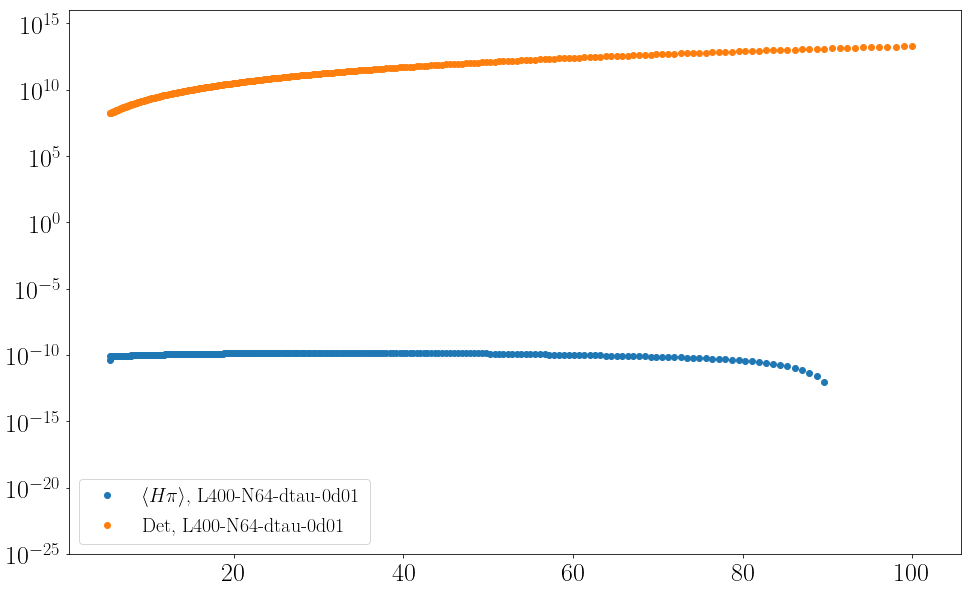

In [46]:
plt.figure(figsize=(16,10))
plt.rc('text', usetex=True)
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : text_size}
plt.rc('font', **font)

for j in range(np.shape(files_list)[0]):

    x = data_txt[files_list[j]][:,5]
    y = data_txt[files_list[j]][:,1]
    plt.plot(1+x,(y),"o",label=r"$\langle H \pi \rangle$, L400-N64-dtau-0d01")
    
    x = data_txt[files_list[j]][:,5]
    y = data_txt[files_list[j]][:,3]
    plt.plot(1+x,np.abs(y),"o",label=r"Det, L400-N64-dtau-0d01")


plt.ylim(1.e-25, 1.e16 )
plt.yscale('log')
plt.legend(fontsize=20)
# plt.ylabel(r"$\langle \mathcal{H} \pi \rangle^2$")
# plt.xlabel(r"$1+z$")
# plt.xlim(1,10)
# plt.xscale('log')
# plt.title(r" k-essence$")




In [42]:
# plt.figure(figsize=(16,10))
# plt.rc('text', usetex=True)
# font = {'family' : 'normal',
#         'weight' : 'bold',
#         'size'   : text_size}
# plt.rc('font', **font)

# x = data_txt['L_25'][:,4]
# y = data_txt['L_25'][:,1]**2

# x2 = data_txt['L_25_kev'][:,4]
# y2 = data_txt['L_25_kev'][:,1]**2
# # plt.semilogy(1+x,y,"o",label=" L=25 Mpc/h, $N_{grid} = 64^3$")
# plt.semilogy(1+x2[:326],(y2[:326]-y[:326])/y[:326],"-",label="$k$-evolution vs second order k-essence, L=25 Mpc/h, $N_{grid} = 64^3$")


# # x = data_txt['L_50'][:,4]
# # y = data_txt['L_50'][:,1]**2
# # plt.semilogy(1+x,y,"o",label="L=50 Mpc/h, $N_{grid} = 64^3$")

# # x = data_txt['L_100'][:,4]
# # y = data_txt['L_100'][:,1]**2
# # plt.semilogy(1+x,y,"o",label="L=100 Mpc/h, $N_{grid} = 64^3$")

# # x = data_txt['L_200'][:,4]
# # y = data_txt['L_200'][:,1]**2
# # plt.semilogy(1+x,y,"o",label="L=200 Mpc/h, $N_{grid} = 64^3$")

# # x = data_txt['L_300'][:,4]
# # y = data_txt['L_300'][:,1]**2
# # plt.semilogy(1+x,y,"o",label="L=300 Mpc/h, $N_{grid} = 64^3$")
# # plt.ylim(1.e-16, 5.e-15 )

# plt.legend(fontsize=20)
# plt.ylabel(r"$ \Delta\langle \mathcal{H} \pi \rangle^2$")
# plt.xlabel(r"$1+z$")
# plt.xlim(1,10)
# # plt.xscale('log')
# plt.title(r"Second-order k-essence vs k-evolution, $c_s^2 = 10^{-8}, w=-0.9$")


